In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Załadowanie danych
movies_url = "https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/tmdb_movies.csv"
genres_url = "https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/tmdb_genres.csv"
movies_df = pd.read_csv(movies_url)
genres_df = pd.read_csv(genres_url)

# Zmiana typów danych w źródłowych df
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Dodatkowe kolumny w df i konieczne zmiany typów danych
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df['release_year'] = movies_df['release_year'].fillna(0).astype(int)

# Zmiany nazw kolumn
genres_df = genres_df.rename(columns={genres_df.columns[0]: 'genre_id'})

# Wyłączenie wyświetlania notacji naukowej
pd.options.display.float_format = '{:.2f}'.format

1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [115]:
# Obliczenie 3. kwartyla rozkładu liczby głosów
third_quartile = movies_df['vote_count'].quantile(0.75)

# Filtrowanie filmów, które mają liczbę głosów większą od 3. kwartyla
filtered_movies_df = movies_df[movies_df['vote_count'] > third_quartile]

# Sortowanie filmów według średniej oceny i wybranie 10 najlepszych
top_rated_movies = filtered_movies_df.nlargest(10, 'vote_average').reset_index()

# Wyświetlenie wyników
print(top_rated_movies[['title', 'vote_average', 'vote_count']])

                      title  vote_average  vote_count
0  The Shawshank Redemption          8.50        8205
1             The Godfather          8.40        5893
2                Fight Club          8.30        9413
3          Schindler's List          8.30        4329
4             Spirited Away          8.30        3840
5    The Godfather: Part II          8.30        3338
6              Pulp Fiction          8.30        8428
7                  Whiplash          8.30        4254
8           The Dark Knight          8.20       12002
9            The Green Mile          8.20        4048


2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [116]:
# Filtrowanie filmów opublikowanych od 2010 do 2016 roku
movies_filtered_years = movies_df[(movies_df['release_year'] >= 2010) & (movies_df['release_year'] <= 2016)]

# Grupowanie danych i obliczanie średniego przychodu oraz średniego budżetu
grouped_movies = movies_filtered_years.groupby('release_year').agg({
    'revenue': 'mean',
    'budget': 'mean'
}).reset_index()

# Wyświetlenie wyników
print(grouped_movies)

   release_year      revenue      budget
0          2010  90438110.08 34495410.94
1          2011  92004130.76 34772320.34
2          2012 116065914.64 34922031.99
3          2013 101348455.82 35523293.65
4          2014 101346599.11 30959887.86
5          2015 105439926.95 31132163.74
6          2016 139049586.04 45703269.23


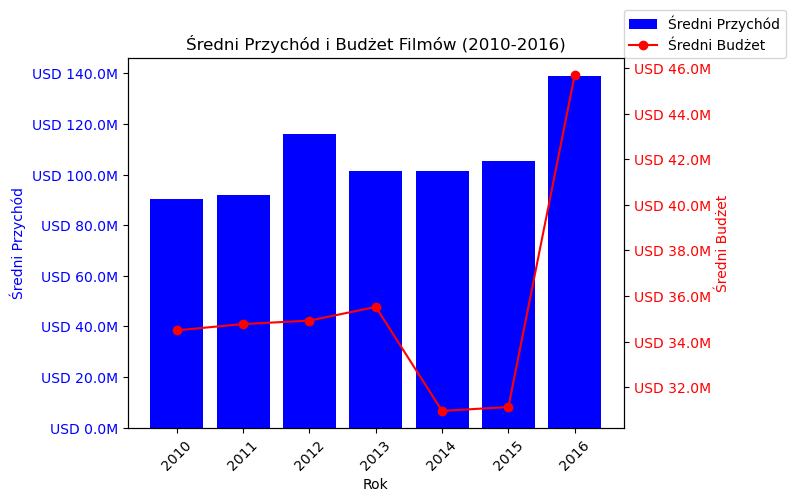

In [117]:
# Funkcja pomocnicza dla poprawnego wyświetlania wartości na osi
def million(x, pos):
    return 'USD {:2.1f}M'.format(x * 1e-6)

formatter = plt.FuncFormatter(million)

# Tworzenie wykresu
fig, ax1 = plt.subplots()

# Wykres kolumnowy dla średnich przychodów
ax1.bar(grouped_movies['release_year'], grouped_movies['revenue'], color='b', label='Średni Przychód')
ax1.set_xlabel('Rok')
ax1.set_ylabel('Średni Przychód', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Dodanie tytułu wykresu
plt.title('Średni Przychód i Budżet Filmów (2010-2016)')

# Oś X formatowanie
ax1.set_xticks(grouped_movies['release_year'])
ax1.set_xticklabels(grouped_movies['release_year'], rotation=45)

# Oś Y formatowanie
ax1.yaxis.set_major_formatter(formatter)
# ax1.yaxis.grid(True)

# Tworzenie drugiej osi dla średnich budżetów
ax2 = ax1.twinx()
ax2.plot(grouped_movies['release_year'], grouped_movies['budget'], color='r', marker='o', label='Średni Budżet')
ax2.set_ylabel('Średni Budżet', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.yaxis.set_major_formatter(formatter)

# Dodanie legendy poza obszarem osi
fig.legend(loc=(1.1, 0.0), bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Wyświetlenie wykresu
plt.show()


3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [81]:
# Łączenie baz filmów i gatunków na podstawie kolumny genre_id
merged_df = pd.merge(movies_df, genres_df, left_on='genre_id', right_on='genre_id', how='left')

# Wyświetlenie wyników
merged_df.head()


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,release_year,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,2009-12-10,2787965087,162.00,Released,Enter the World of Pandora.,Avatar,7.20,11800,28.00,2009.00,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,2007-05-19,961000000,169.00,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500,12.00,2007.00,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,2015-10-26,880674609,148.00,Released,A Plan No One Escapes,Spectre,6.30,4466,28.00,2015.00,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,2012-07-16,1084939099,165.00,Released,The Legend Ends,The Dark Knight Rises,7.60,9106,28.00,2012.00,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.93,2012-03-07,284139100,132.00,Released,"Lost in our world, found in another.",John Carter,6.10,2124,28.00,2012.00,Action


4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [84]:
most_common_genre = merged_df['genres'].value_counts().idxmax()
number_of_movies = merged_df['genres'].value_counts().max()

print(f"Najczęściej występujący gatunek: {most_common_genre}")
print(f"Liczba filmów tego gatunku: {number_of_movies}")

Najczęściej występujący gatunek: Drama
Liczba filmów tego gatunku: 1207


5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [86]:
# Grupowanie danych według gatunku i obliczanie średniej długości trwania filmu
average_runtime_per_genre = merged_df.groupby('genres')['runtime'].mean()

# Znalezienie gatunku o najdłuższym średnim czasie trwania filmu
longest_avg_runtime_genre = average_runtime_per_genre.idxmax()
longest_avg_runtime = average_runtime_per_genre.max()

print(f"Gatunek filmu, który trwa średnio najdłużej: {longest_avg_runtime_genre}")
print(f"Średnia długość trwania filmów tego gatunku: {longest_avg_runtime} minut")


Gatunek filmu, który trwa średnio najdłużej: History
Średnia długość trwania filmów tego gatunku: 133.96 minut


6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

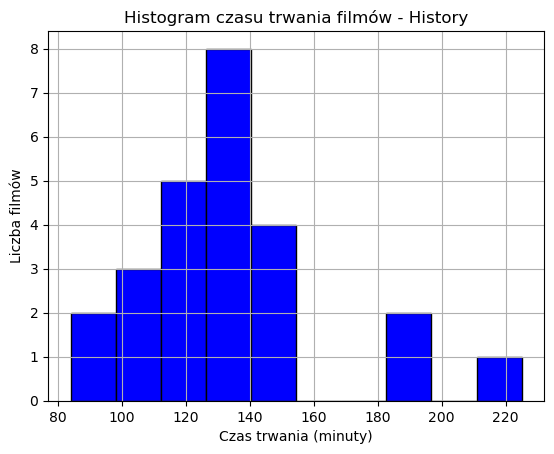

In [91]:
# Filtrowanie filmów należących do gatunku o najdłuższym średnim czasie trwania
longest_runtime_movies = merged_df[merged_df['genres'] == longest_avg_runtime_genre]

# Tworzenie histogramu czasu trwania filmów dla tego gatunku
plt.hist(longest_runtime_movies['runtime'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title(f'Histogram czasu trwania filmów - {longest_avg_runtime_genre}')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.grid(True)
plt.show()